In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import callbacks
from helpers import ILottoCSV, beam_search_decoder
from ilotto import ILotto, CosineAnnealingScheduler
from helpers import fetch_dataset, train_test_split
from train import get_compiled_model, train

print("Tensorflow version " + tf.__version__)
tf.config.optimizer.set_jit(True)

Tensorflow version 2.19.0


In [2]:
orig_lotto_csv="input/Orig_IL_lotto.csv"
lotto_csv_file="input/lotto_IL_filtered.csv"

lotto_ds = fetch_dataset(orig_lotto_csv, lotto_csv_file)
X_train, y_train, X_test, y_test = train_test_split(lotto_ds)

ILottoCSV(orig_lotto_csv, lotto_csv_file)

lotto = pd.read_csv(lotto_csv_file, index_col = 'Date')
print(lotto)

            Ball_1  Ball_2  Ball_3  Ball_4  Ball_5  Ball_6  Ball_Bonus
Date                                                                  
25/03/2025       6      13      18      20      22      28           5
22/03/2025       1       3       8      14      17      33           2
20/03/2025       2       8      11      21      25      34           2
18/03/2025      10      11      23      26      29      34           1
15/03/2025       4       7       9      10      12      27           7
...            ...     ...     ...     ...     ...     ...         ...
29/10/1968       3       9      26      32      34      36           1
15/10/1968       1       6      23      29      33      34           7
08/10/1968       7       9      10      17      23      34           4
01/10/1968       1       7       8       9      11      30           4
03/09/1968       3      14      18      22      25      33           2

[2317 rows x 7 columns]


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2257, 10, 7)
(2257, 7)
(50, 10, 7)
(50, 7)


In [ ]:
epochs=3
lr_max = 1e-4
lr_min = 1e-6
batch_size = 32
model = get_compiled_model(epochs, lr_max=lr_max, lr_min=lr_min)

model.summary()


Model: ""

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_5             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_6             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ additive_attention              │ ?                      │   0 (unbuilt) │
│ (AdditiveAttention)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = train(model, X_train, y_train, X_test, y_test, epochs=epochs, batch_size=batch_size, lr_max=lr_max, lr_min=lr_min)

Epoch 1/3
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.6099 - sparse_top_k: 0.1450
Epoch 1: saving model to training_2/cp-0001.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.6099 - sparse_top_k: 0.1450 - val_loss: 3.6097 - val_sparse_top_k: 0.1600
Epoch 2/3
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.6095 - sparse_top_k: 0.1455
Epoch 2: saving model to training_2/cp-0002.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.6095 - sparse_top_k: 0.1457 - val_loss: 3.6097 - val_sparse_top_k: 0.1600
Epoch 3/3
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.6095 - sparse_top_k: 0.1512
Epoch 3: saving model to training_2/cp-0003.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.6095 - sparse_top_k: 0.1511 - val_loss: 3.6097 - val_sparse_top_k: 0.1600


In [6]:
hist = pd.DataFrame(history)

0.1599999964237213


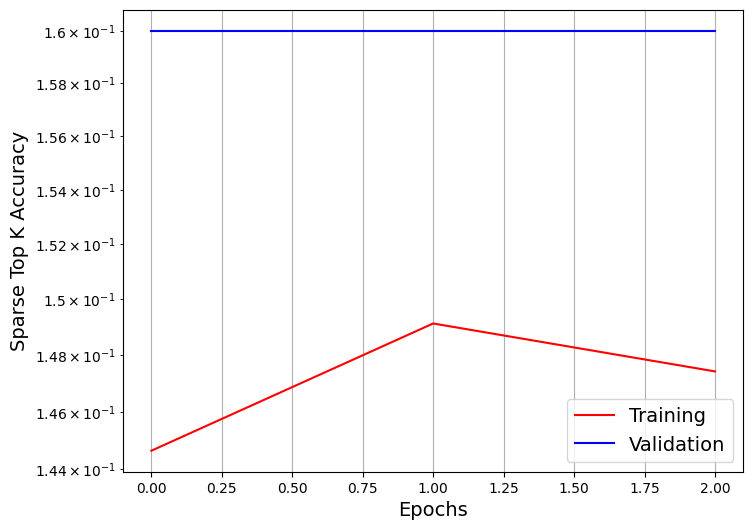

In [7]:
import matplotlib.pyplot as plt
print(hist['val_sparse_top_k'].max())

plt.figure(figsize = (8, 6))
plt.semilogy(hist['sparse_top_k'], '-r', label = 'Training')
plt.semilogy(hist['val_sparse_top_k'], '-b', label = 'Validation')
plt.ylabel('Sparse Top K Accuracy', fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()
plt.show()

In [8]:
model.load_weights('model/Ilotto.keras')
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


In [9]:
for i in range(y_test.shape[0]):
    print('Prediction:\t', pred[i] + 1)
    print('GoundTruth:\t', y_test[i] + 1)
    print('-' * 40)

Prediction:	 [10 10 10 10 10 10 10]
GoundTruth:	 [ 6 13 18 20 22 28  5]
----------------------------------------
Prediction:	 [10 10 10 10 10 10 10]
GoundTruth:	 [ 1  3  8 14 17 33  2]
----------------------------------------
Prediction:	 [10 10 10 10 10 10 10]
GoundTruth:	 [ 2  8 11 21 25 34  2]
----------------------------------------
Prediction:	 [10 10 32 32 32 32 32]
GoundTruth:	 [10 11 23 26 29 34  1]
----------------------------------------
Prediction:	 [10 10 10 10 10 32 32]
GoundTruth:	 [ 4  7  9 10 12 27  7]
----------------------------------------
Prediction:	 [10 10 32 32 32 32 32]
GoundTruth:	 [ 3  5 14 19 22 27  2]
----------------------------------------
Prediction:	 [32 32 32 32 32 32 32]
GoundTruth:	 [ 1  4 16 26 27 34  2]
----------------------------------------
Prediction:	 [32 32 32 32 32 32 32]
GoundTruth:	 [11 15 21 22 28 29  1]
----------------------------------------
Prediction:	 [32 32 32 32 32 32 32]
GoundTruth:	 [15 17 21 30 34 37  7]
------------------------

In [10]:
X_latest = X_test[0][1:]
X_latest = np.concatenate([X_latest, y_test[0].reshape(1, 7)], axis = 0)
X_latest = X_latest.reshape(1, X_latest.shape[0], X_latest.shape[1])
print(X_latest + 1)

[[[ 1  7 18 23 26 31  4]
  [ 4  8 15 24 29 30  7]
  [11 16 28 29 31 35  3]
  [ 5  7 19 26 32 33  6]
  [ 8 18 25 29 32 35  2]
  [ 5 13 30 33 34 36  3]
  [ 5  6 26 27 30 32  2]
  [17 22 27 33 34 35  2]
  [ 7 12 15 22 28 33  6]
  [ 6 13 18 20 22 28  5]]]


In [11]:
pred_latest = model.predict(X_latest)
pred_latest = np.squeeze(pred_latest)
pred_latest_greedy = np.argmax(pred_latest, axis = 1)
print(pred_latest_greedy + 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[10 10 10 10 10 10 10]


In [12]:
beam_width = 10
replace = True

result = beam_search_decoder(pred_latest, beam_width, replace)
print('Beam Width:\t', beam_width)
print('Replace:\t', replace)
print('-' * 85)
for seq in result:
    print('Prediction: ', np.array(seq[0]) + 1, '\tLog Likelihood: ', seq[1])

Beam Width:	 10
Replace:	 True
-------------------------------------------------------------------------------------
Prediction:  [10 10 10 10 10 10 10] 	Log Likelihood:  -25.11212881151218
Prediction:  [10 10 10 10 10 10 25] 	Log Likelihood:  -25.112988428643607
Prediction:  [10 10 10 10 10 10 32] 	Log Likelihood:  -25.11391582557085
Prediction:  [10 10 10 10 10 25 10] 	Log Likelihood:  -25.11417786219936
Prediction:  [10 10 10 10 10 32 10] 	Log Likelihood:  -25.11491745695615
Prediction:  [10 10 10 10 10 25 25] 	Log Likelihood:  -25.115037479330788
Prediction:  [10 10 10 10 25 10 10] 	Log Likelihood:  -25.11562121496488
Prediction:  [10 10 10 10 10 32 25] 	Log Likelihood:  -25.11577707408758
Prediction:  [10 10 10 10 10 25 32] 	Log Likelihood:  -25.115964876258033
Prediction:  [10 10 10 10 32 10 10] 	Log Likelihood:  -25.11633611914877


In [13]:
beam_width = 10
replace = False

result = beam_search_decoder(pred_latest, beam_width, replace)
print('Beam Width:\t', beam_width)
print('Replace:\t', replace)
print('-' * 85)
for seq in result:
    print('Prediction: ', np.array(seq[0]) + 1, '\tLog Likelihood: ', seq[1])

Beam Width:	 10
Replace:	 False
-------------------------------------------------------------------------------------
Prediction:  [10  5 17 25 32  1 30] 	Log Likelihood:  -25.148803772591865
Prediction:  [10  5 17 32 25  1 30] 	Log Likelihood:  -25.14901932606911
Prediction:  [10  5 17 25 32 30  1] 	Log Likelihood:  -25.149141140810578
Prediction:  [10  5 17 25 32 30  3] 	Log Likelihood:  -25.1491631551483
Prediction:  [10  5 17 32 25 30  1] 	Log Likelihood:  -25.14935669428782
Prediction:  [10  5 17 32 25 30  3] 	Log Likelihood:  -25.149378708625544
Prediction:  [10  5 17 25 32  1  3] 	Log Likelihood:  -25.14944226331934
Prediction:  [ 5 10 17 25 32  1 30] 	Log Likelihood:  -25.149610762481664
Prediction:  [10  5 17 32 25  1  3] 	Log Likelihood:  -25.149657816796584
Prediction:  [10  5 17 25 32  3 30] 	Log Likelihood:  -25.149710120268814
